In [1]:
#Importemos algunas de las librerías más clásicas para el manejo de datos en Python

#Pandas es la librería básica para la manipulación y análisis de datos
import pandas as pd

#Numpy es la biblioteca para crear vectores y matrices, además de un conjunto grande de funciones matemáticas
import numpy as np

#Seaborn es una librería que usamos para graficar y está baso en Matplotlib
import seaborn as sns

#Matplotlib es la librería clásica de visualización
import matplotlib.pyplot as plt

#Statsmodels es la biblioteca para realizar modelos
import statsmodels.formula.api as smf

In [3]:
#Cargar el data set
df_nations = pd.read_csv("https://raw.githubusercontent.com/DireccionAcademicaADL/Nations-DB/main/nations.csv", encoding="ISO-8859-1")

C:\Users\alejo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


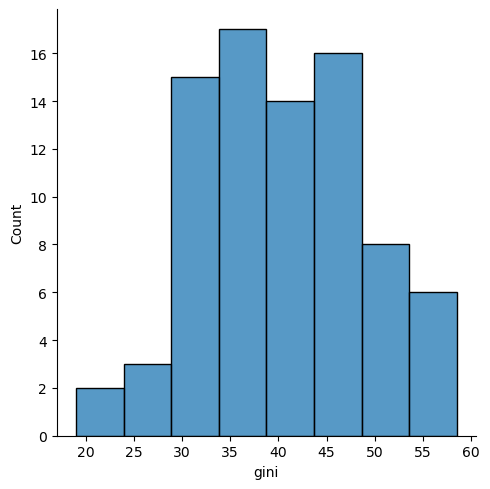

In [5]:
#Uso de seaborn, para un histograma de distribución del campo gini
sns.displot(df_nations['gini'], kind='hist')

C:\Users\alejo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


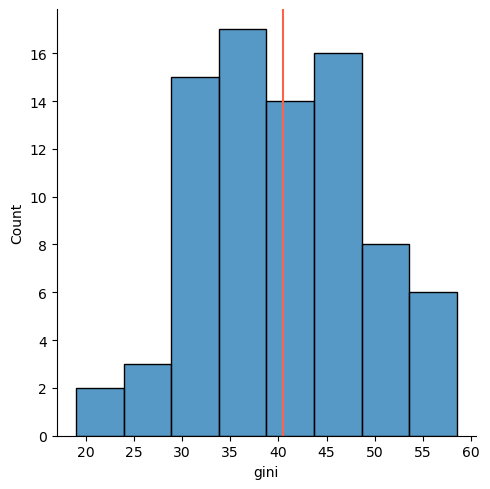

In [7]:
#Uso de matplotlib, para visualizar el valor promedio del gini
sns.displot(df_nations['gini'], kind='hist')
plt.axvline(df_nations['gini'].mean(), color = 'tomato')

In [9]:
#Crear DataSet para Africa
df_africa = df_nations[df_nations['region'] == 'Africa']

In [11]:
#Crear DataSet para Europa
df_europa = df_nations[df_nations['region'] == 'Europa']

In [23]:
# Guardar el valor promedio de mortalidad infantil para Europa y África
media_europa = df_europa['chldmort'].mean()
media_africa = df_africa['chldmort'].mean()

<Axes: xlabel='region', ylabel='chldmort'>

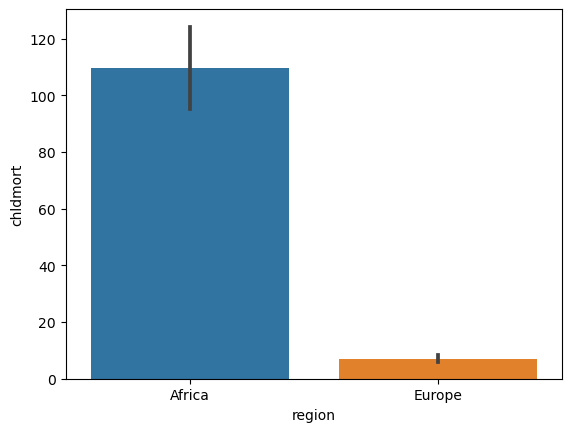

In [27]:
#Graficar el resultado anterior
#sns.barplot(x=['Europa', 'Africa'], y=[media_europa, media_africa])
df_euafr = df_nations.loc[df_nations["region"].isin(["Europe","Africa"])]
sns.barplot(data=df_euafr, x="region", y="chldmort")

In [31]:
#Alfabetismo promedio entre Américas y el Resto del Mundo
media_americas = df_nations[df_nations['region']=='Americas']['literacy'].mean()
media_resto_mundo = df_nations[df_nations['region']!='Americas']['literacy'].mean()

C:\Users\alejo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

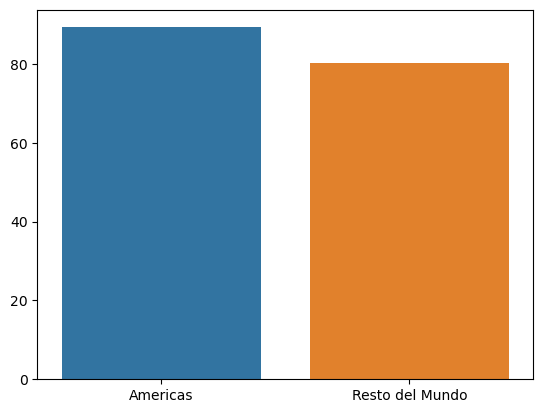

In [33]:
#Graficación del resultado
sns.barplot(x=['Americas', 'Resto del Mundo'], y=[media_americas, media_resto_mundo])

<Axes: xlabel='region', ylabel='school'>

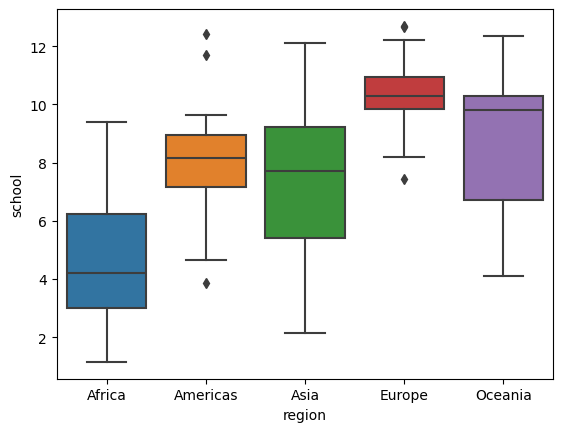

In [35]:
# Ahora usando gráfico Boxplot para observar la distribución de la escolaridad por región
sns.boxplot(x=df_nations['region'], y=df_nations['school'])

In [37]:
#Eliminar datos perdidos en el dataset.
df_nations_limpia = df_nations.dropna()

In [39]:
df_nations_limpia

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.100000,33.299999
11,12,Congo (Dem Rep),Africa,279.799988,3.416667,201.399994,199.00,47.516666,61654348,33.633331,0.6552,66.800003,0.100000,44.400002
12,13,Côte d'Ivoire,Africa,1539.199951,3.200000,129.399994,123.25,53.049999,18844750,48.666664,0.6132,55.299999,1.450000,46.099998
14,15,Egypt,Africa,4754.399902,5.950000,46.599998,24.75,72.333336,77645648,43.183334,0.3092,68.900002,8.450000,32.099998
17,18,Ethiopia,Africa,741.400024,1.500000,72.400002,112.00,57.049999,78593232,16.283333,0.8700,29.799999,0.300000,29.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,Moldova,Europe,2553.600098,9.533333,33.799999,18.00,68.366669,3660717,45.066666,0.9054,98.500000,7.600000,38.000000
166,167,Poland,Europe,15446.400391,9.816667,14.800000,7.25,75.550003,38211584,61.183334,0.7490,99.500000,29.850000,34.200001
168,169,Romania,Europe,10560.400391,10.283333,32.000000,14.50,73.116669,21622482,56.049999,0.7584,97.699997,16.200001,31.200001
169,170,Russian Federation,Europe,13424.799805,9.783334,30.000000,14.25,67.399994,143305536,73.016663,0.8206,99.599998,39.349998,42.299999


<Axes: xlabel='school', ylabel='literacy'>

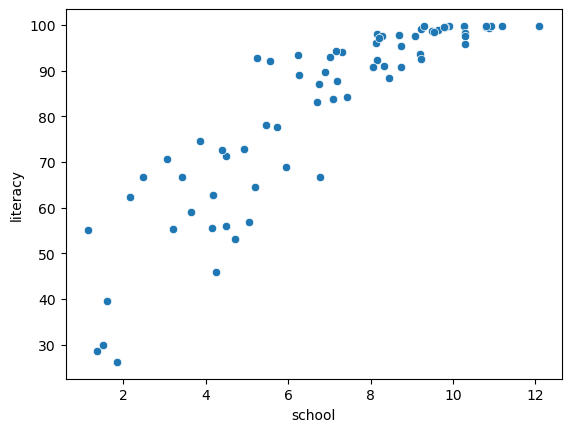

In [41]:
#Tasa de escolaridad ("school") versus analfabetismo ("literacy")
#A mayor escolaridad mayor tasa de analfabetismo
sns.scatterplot(x=df_nations_limpia['school'], y=df_nations_limpia['literacy'])

<Axes: xlabel='school', ylabel='gdp'>

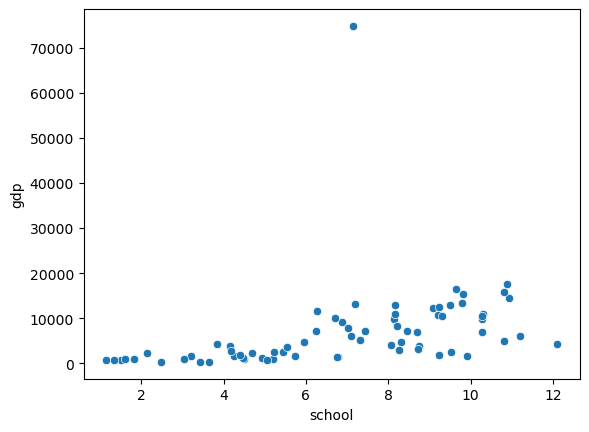

In [45]:
#Tasa de escolaridad versus el PIB
sns.scatterplot(x=df_nations_limpia['school'], y=df_nations_limpia['gdp'])

In [49]:
#¿Qué es correlación?
#Correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente. 
#Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.
corr = df_nations.corr()

4      False
11     False
12     False
14     False
17     False
       ...  
161    False
166    False
168    False
169    False
177    False
Name: country, Length: 71, dtype: bool